In [7]:
import os
import mne
import pandas
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib qt

In [8]:
all_file_path = glob('4244171/*.edf')

In [9]:
healthy_file_path=[i for i in all_file_path if 'H' in i.split('\\')[1]]
patient_file_path=[i for i in all_file_path if 'M' in i.split('\\')[1]]

### Filtering Data

In [10]:
raw=mne.io.read_raw_edf(all_file_path[0],preload=True)
raw= raw.filter(l_freq=0.1, h_freq=45)

Extracting EDF parameters from E:\ML Project Data\4244171\6921143_H S15 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77311  =      0.000 ...   301.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Using matplotlib as 2D backend.


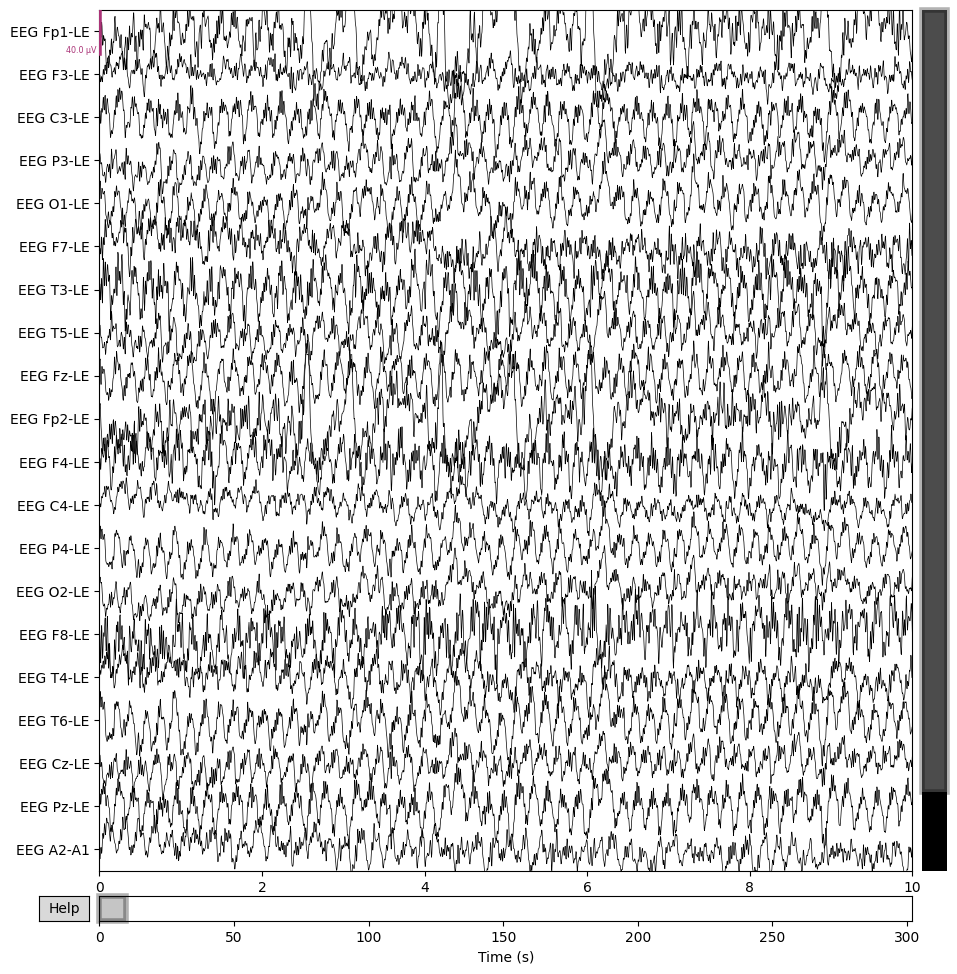

In [11]:
raw.plot()

In [12]:
raw.ch_names

['EEG Fp1-LE',
 'EEG F3-LE',
 'EEG C3-LE',
 'EEG P3-LE',
 'EEG O1-LE',
 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE',
 'EEG Fz-LE',
 'EEG Fp2-LE',
 'EEG F4-LE',
 'EEG C4-LE',
 'EEG P4-LE',
 'EEG O2-LE',
 'EEG F8-LE',
 'EEG T4-LE',
 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE',
 'EEG A2-A1',
 'EEG 23A-23R',
 'EEG 24A-24R']

Channels marked as bad:
none


### Cropping Data And Removing Unnecessary Channels

In [7]:
def save_data(file_path):
    raw=mne.io.read_raw_edf(file_path,preload=True)
    raw= raw.filter(l_freq=0.1, h_freq=45)
    start_time = 0.0  # Replace with the start time you want to crop in seconds
    end_time = 100.0   # Replace with the end time you want to crop in seconds
    raw= raw.crop(tmin=start_time, tmax=end_time) # Crop the EEG data to the specified time frame
    raw.drop_channels('EEG A2-A1',on_missing='ignore')
    raw.drop_channels('EEG 23A-23R',on_missing='ignore')
    raw.drop_channels('EEG 24A-24R',on_missing='ignore')
    output_file_path = "Cropped Data\\"+file_path.split('\\')[1].split('.')[0]+".fif"
    raw.save(output_file_path, overwrite=True)

In [8]:
%%capture
for i in all_file_path:
    save_data(i)

In [4]:
new_fp=glob('Cropped Data/*.fif')

In [6]:
raw=mne.io.read_raw_fif(new_fp[0],preload=True)
raw.ch_names

Opening raw data file Cropped Data\6921143_H S15 EO.fif...
Isotrak not found
    Range : 0 ... 25600 =      0.000 ...   100.000 secs
Ready.
Reading 0 ... 25600  =      0.000 ...   100.000 secs...


C:\Users\Dell\AppData\Local\Temp\ipykernel_15144\605938048.py:1: RuntimeWarning: This filename (Cropped Data\6921143_H S15 EO.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif(new_fp[0],preload=True)


['EEG Fp1-LE',
 'EEG F3-LE',
 'EEG C3-LE',
 'EEG P3-LE',
 'EEG O1-LE',
 'EEG F7-LE',
 'EEG T3-LE',
 'EEG T5-LE',
 'EEG Fz-LE',
 'EEG Fp2-LE',
 'EEG F4-LE',
 'EEG C4-LE',
 'EEG P4-LE',
 'EEG O2-LE',
 'EEG F8-LE',
 'EEG T4-LE',
 'EEG T6-LE',
 'EEG Cz-LE',
 'EEG Pz-LE']